### **1. Importing Liabraries**

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


### **2. Loading Datasets**

In [118]:
data=pd.read_csv("../data/clean_data.csv",index_col=0,parse_dates=['trans_date_trans_time','dob'])
data.head(10)
print("Dataset has " , data.shape[0] , " rows and ",data.shape[1] , " columns")
print('column names: \n') 
print('\n'.join(list(data.columns)))

Dataset has  1852394  rows and  29  columns
column names: 

trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud
label
age
trans_year
trans_month
trans_days
trans_week_days
trans_hour


### **3.Deleting Unnecessary Columns**

In [119]:
# list of the columns to be dropped

drop_cols = ['trans_date_trans_time','street','merchant','zip','first','last','trans_num','job','dob','city','trans_days','trans_year']

In [120]:
data.drop(drop_cols, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns) # lets look at the remaining list of columns

['cc_num',
 'category',
 'amt',
 'gender',
 'state',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'label',
 'age',
 'trans_month',
 'trans_week_days',
 'trans_hour']

In [121]:
data

,cc_num,category,amt,gender,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,label,age,trans_month,trans_week_days,trans_hour
0,2703186189652095,misc_net,4.97,F,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,Train,30.0,1,Tuesday,0
1,630423337322,grocery_pos,107.23,F,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,Train,40.0,1,Tuesday,0
2,38859492057661,entertainment,220.11,M,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,Train,56.0,1,Tuesday,0
3,3534093764340240,gas_transport,45.00,M,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,Train,51.0,1,Tuesday,0
4,375534208663984,misc_pos,41.96,M,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,Train,32.0,1,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,Test,54.0,12,Thursday,23
1852390,3556613125071656,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,Test,21.0,12,Thursday,23
1852391,6011724471098086,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,Test,39.0,12,Thursday,23
1852392,4079773899158,travel,7.99,M,ID,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,Test,55.0,12,Thursday,23


### **4. Split the Train - Test Dataset**

In [122]:
train = data[data['label'] == 'Train'] # splitting data in Train dataset

test = data[data['label'] == 'Test'] # test in label


In [123]:
train.drop('label', axis =1, inplace = True) # dropping the label column in Train dataset

test.drop('label', axis =1, inplace = True) # dropping the label column in Test dataset

C:\Users\sabhe\AppData\Local\Temp\ipykernel_28316\1154386741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('label', axis =1, inplace = True) # dropping the label column in Train dataset
C:\Users\sabhe\AppData\Local\Temp\ipykernel_28316\1154386741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('label', axis =1, inplace = True) # dropping the label column in Test dataset


### **5. Creating Dummy Variables**

In [124]:
#convert category to dummy variables in both Train and Test datasets

train_data=pd.get_dummies(train, drop_first=True)
test_data=pd.get_dummies(test, drop_first=True)

In [127]:
import pandas as pd

# Assuming df1 and df2 are your two DataFrames
columns_only_in_df1 = set(train_data.columns) - set(test_data.columns)

print("Columns present in df1 but not in df2:")
print(columns_only_in_df1)

Columns present in df1 but not in df2:
set()


In [126]:
train_data.drop(columns=['state_DE'],axis=1,inplace=True)

### **6. Split the Train and Test Datasets into X_train,y_train,X_test,y_test**

In [128]:
# Since our data is already splitted in Train and Test data thats why we are not using splitting function to split the data instaed we will mnaully do that  
X_train = train_data.drop('is_fraud', axis = 1)
y_train = train_data['is_fraud'] 

X_test = test_data.drop('is_fraud', axis = 1) 
y_test = test_data['is_fraud'] 


In [129]:
X_train

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,age,trans_month,...,state_WA,state_WI,state_WV,state_WY,trans_week_days_Monday,trans_week_days_Saturday,trans_week_days_Sunday,trans_week_days_Thursday,trans_week_days_Tuesday,trans_week_days_Wednesday
0,2703186189652095,4.97,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,30.0,1,...,0,0,0,0,0,0,0,0,1,0
1,630423337322,107.23,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,40.0,1,...,1,0,0,0,0,0,0,0,1,0
2,38859492057661,220.11,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,56.0,1,...,0,0,0,0,0,0,0,0,1,0
3,3534093764340240,45.00,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,51.0,1,...,0,0,0,0,0,0,0,0,1,0
4,375534208663984,41.96,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,32.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,58.0,6,...,0,0,0,0,0,0,1,0,0,0
1296671,6011149206456997,51.70,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,40.0,6,...,0,0,0,0,0,0,1,0,0,0
1296672,3514865930894695,105.93,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,52.0,6,...,0,0,0,0,0,0,1,0,0,0
1296673,2720012583106919,74.90,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,39.0,6,...,0,0,0,0,0,0,1,0,0,0


### **7. Standardizing**

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [109]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X_train)
X_train = pd.DataFrame(standard_df,columns=X_train.columns)

In [110]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X_test)
X_test = pd.DataFrame(standard_df,columns=X_test.columns)


### **8. Resampling Datasets**

In [130]:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

In [131]:
print(X_resampled.shape,y_resampled.shape)

(2578338, 80) (2578338,)


### **9. Modeling**


#### **Model 1: Random Forest Classifier**

Random Forest is an ensemble method that constructs multiple decision trees, typically trained through the "bagging" technique, known as Bootstrap Aggregation. In the context of a classification problem, each tree is built from a bootstrap sample, providing diversity in the training data. This method is particularly useful for investigating feature importance in large datasets.

The foundational learner in Random Forest is the Decision Tree. Each tree in the ensemble is trained on a subset of the data, incorporating both raw sampling and feature sampling. The training process is conducted in parallel, enhancing computational efficiency.

To arrive at a final prediction, unweighted voting is employed across the ensemble. Notably, Random Forest is considered easier to tune and less prone to overfitting compared to individual decision trees.

Unlike some algorithms, Random Forest classifiers typically do not require feature scaling due to their Decision Tree-based nature. However, for our initial case, we are experimenting with predicting values using scaled data to explore potential performance enhancements.

In [132]:
rf_model = RandomForestClassifier(random_state =42)
rf_model.fit(X_resampled, y_resampled)
rf_preds = rf_model.predict(X_test)

In [133]:
print('Classification report:\n', classification_report(y_test, rf_preds))
conf_mat = confusion_matrix(y_true=y_test, y_pred=rf_preds)
print('Confusion matrix:\n', conf_mat)

print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.51      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.75      0.81    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553331    243]
 [  1056   1089]]
Share of Non-Fraud in Test Data: 0.9961


**Hyperparameter tuning :Build our own Grid-search**

Manual Hyperparameter Tuning
* Increasing the predictive power
  * n_estimators : number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions.
  * max_features : maximum number of features random forest considers to split a node.
* Increasing the model's speed
  * n_jobs : The n_jobs hyperparameter tells the engine how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.
  * random_state : hyperparameter makes the model’s output replicable
  * The minimum number of samples required to be at a leaf node

In [10]:
### Manual Hyperparameter Tuning
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_resampled, y_resampled)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [11]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.116 / Recall: 0.782 / Accuracy: 0.968
Est: 10 / Depth: 20 ---- Precision: 0.284 / Recall: 0.95 / Accuracy: 0.987
Est: 10 / Depth: 30 ---- Precision: 0.407 / Recall: 0.986 / Accuracy: 0.992
Est: 10 / Depth: None ---- Precision: 0.994 / Recall: 0.99 / Accuracy: 1.0
Est: 50 / Depth: 10 ---- Precision: 0.146 / Recall: 0.787 / Accuracy: 0.975
Est: 50 / Depth: 20 ---- Precision: 0.309 / Recall: 0.953 / Accuracy: 0.989
Est: 50 / Depth: 30 ---- Precision: 0.493 / Recall: 0.997 / Accuracy: 0.995
Est: 50 / Depth: None ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 1.0
Est: 100 / Depth: 10 ---- Precision: 0.143 / Recall: 0.782 / Accuracy: 0.974
Est: 100 / Depth: 20 ---- Precision: 0.332 / Recall: 0.951 / Accuracy: 0.99
Est: 100 / Depth: 30 ---- Precision: 0.521 / Recall: 0.999 / Accuracy: 0.995
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 1.0 / Accuracy: 1.0


In [15]:

model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=None,
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_resampled,y_resampled)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[1836742    6001]
 [    645    9006]]
0.9964122103612947
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1842743
           1       0.60      0.93      0.73      9651

    accuracy                           1.00   1852394
   macro avg       0.80      0.96      0.86   1852394
weighted avg       1.00      1.00      1.00   1852394



In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)


auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score}")



AUC Score: 0.9666921909935491


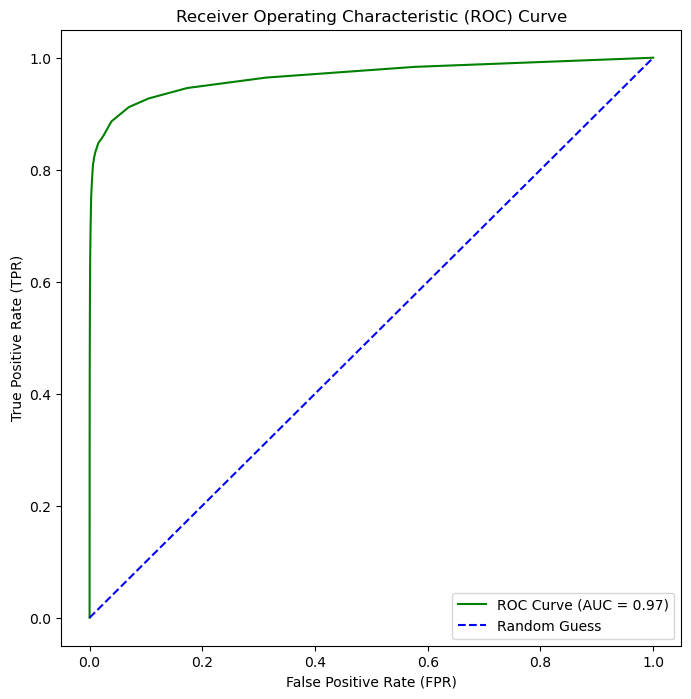

In [144]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random Guess')

# Title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

# Show legend
plt.legend(loc='best')

# Save or display the plot
plt.savefig('ROC.png', dpi=300)
plt.show()

In [149]:
from sklearn.metrics import recall_score, precision_score, f1_score, precision_recall_curve

# Calculate precision, recall, and F1 score

recall = recall_score(y_test, rf_preds)
precision = precision_score(y_test, rf_preds)
f1 = f1_score(y_test, rf_preds, average='weighted')

# Print precision, recall, and F1 score
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")
print(f"F1 Score: {f1}")



Recall Score: 0.5076923076923077
Precision Score: 0.8175675675675675
F1 Score: 0.9973900641009061


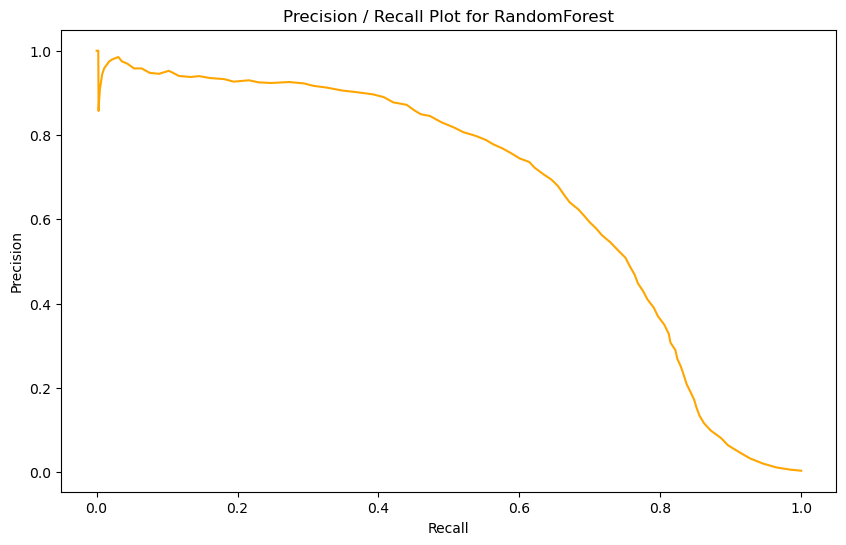

In [152]:
# Plot Precision/Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Plot for RandomForest')
plt.show()